# **Project Name - Yes Bank Stock Closing Price Prediction**

**Project Type - Regression**

**Contribution - Individual** 

**Name- Swapnil Wankhede**


# **Project Summary**

Yes Bank is a well-known bank in the Indian financial domain, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and  any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, hightest, and lowest stock prices of every month. The given dataset which contains 185 row labels with 5 variables including no missing and no duplicates values. The close pricing is to considered as dependent variable and Open, high, low pricing are considered as independent variables.  

The main objective is to predict the stock's closing price of the month.

First, data was loaded, we did the Exploratory Data Analysis where we tried to know about various variable and their relationship through the graphs like scatter plots to know about the linear relationship between dependent and independent variable, histogram with bell shaped curve to know about how the variable is distributed, box whisker plot, pair-wise plot, heatmap matrics etc.
It was found that the given data was positively skewed. We tried different transformation. By using the log transformation, the given was normally distributed was shown in histogram. From the scatter plot, it was observed that Variance around the regression line is same at origin sided portion after that it is showing heteroscedasticity before the transformation. After the transformation, It means that the variance around the regression line is the same for all values of the predictor variables. 

We formed the assumption and obtained insights by visualizing of dependent variable (line graph) and hypothesis testing ( using parametric t-test) to give the strogest evidence how close pricing of nth day is corelated with (n+1) th day of opening price.

We measured the amount of multicollinearity in regression analysis using Variance Inflation Factor (VIF). It was found that predictor variable showed multicollinearity but no variable was dropped as we had only 3 independent variable then we did data pre-processing. We did the feature engineering and data preprocessing. 

Finally, we implemented models like multiple liner regression, Ridge Regression, LASSO regression and Elastic Net Regression. We compared the implemented models by using performace merics which are MSE, RMSE, MAE, R squared score and adj. R squared score.

We came to conclusion that Elastic Net Regression is the best performing model with adjusted R squared score is 0.9931 in order to predict the closing price of stock. It was found that all models fits a given testing set of data with level of significance 5%. By visualizing the dependent variable, we found that the news directly impacted the stock price.  It was observed that there was linear relationship between nth day closing price and (n+1)th day.  After the log transformation, Distribution of features are similar to normal distribution. The mean and median values are nearly same. It diminishes the outlier's effect and heteroscedasticity.  In multiple linear regression,  we concluded that the close price of stock is dependent of Highest, Lowest and Opening price of stock i.e ˆβ1 ≠ ˆβ2 ≠ ˆβ3 ≠ 0. (using statistical parametric F-test) It may be possible that estimate parameters were losing preciseness as multicollinearity was considered.


# **GitHub Link -**

# **Problem Statement**

Yes Bank is a well-known bank in the Indian financial domain, headquartered in Mumbai,India and was founded by Rana Kapoor and Ashok Kapoor in 2004. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, hightest, and lowest stock prices of every month.

The main objective is to predict the stock's closing price of the month. 

# **Let's Begin!**

## ***1.Know Your Data***

### Import Libraries

In [73]:
# Import Libraries
import numpy as np                                        # vectors and matrices.
import pandas as pd                                       # tables and data manipulations.
import matplotlib.pyplot as plt                           #  visualization.
%matplotlib inline
import seaborn as sns                                     # interactive visualization.

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression         # statistical modeling.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scipy.stats 
from sklearn.model_selection import GridSearchCV                                       

import warnings                                            # do not disturb mode.
warnings.filterwarnings('ignore')


### Dataset Loading

In [74]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
path = '/content/drive/MyDrive/Colab Notebooks/capstone_project_02/data_YesBank_StockPrices.csv'
dataset = pd.read_csv(path)

### Dataset First View

In [76]:
# Dataset First Look
dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns Count

In [77]:
dataset.shape

(185, 5)

The shape of the dataset is 185 rows and 5 columns.

### Data Information

In [78]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### Duplicate Values

In [79]:
# Dataset Duplicate Value Count
dataset.duplicated().value_counts()

False    185
dtype: int64

### Missing Values/Null Values

In [80]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### The given dataset has 185 observations with 5 features including no missing values and no duplicates values. Date feature is of object type. closing, opening, highest and lowest stock prices are features in float datatypes.

##***2. Understanding Variables***

In [81]:
# Convert date column to a proper datetime datatype yyyy-mm-dd.
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x, "%b-%y")))

In [82]:
#To return top 5 rows.
dataset.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [83]:
# To return last 5 rows.
dataset.tail()

,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


### Variables Description

In [84]:
# Displays summary statistics
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


We can see from the dataset above, all the variables are quantitive it means it shows numerical values. There is no categorical data present.Following are variables in the dataset have been elaborated with basic meanings:


*   Date :- The date (Month and Year provided)
*   Open :- The price of the stock at the beginning of a particular time period.
*   Close :- The trading price at the end (in this case end of the month)
*   High :-The Maximum price at which a stock traded during the period.
*   Low :-The Lowest price at which a stock traded during the period.

In [85]:
# Setting date coloum as index as we need to track variation in stock price on different dates.
dataset.set_index('Date', inplace = True)

The main objective is to predict the stock's closing price of the month so the closing price of stock have to be considered as dependent features whereas rest of the features are independent features.

In [86]:
dependent_variable = 'Close'          # predicted/explained variable

independent_variables =list(set(dataset.columns.tolist())-{dependent_variable})   # predictor/explanatory variable.
independent_variables

['Open', 'Low', 'High']

### 3. ***Data Vizualization, Storytelling & Experimenting with Plots : Understand the relationships between variables***

#### **Line plot**

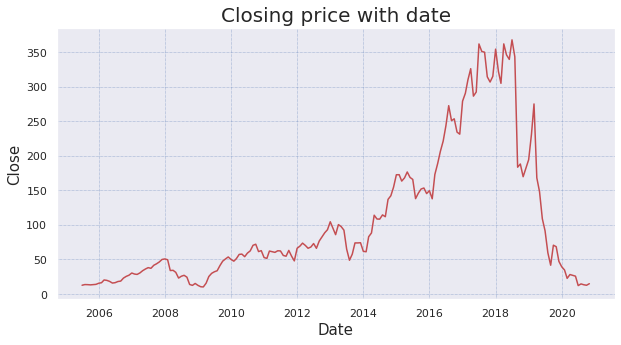

In [87]:
# plot dependent variable:
plt.rcParams['figure.figsize']=(10,5)
plt.plot(dataset['Close'], color= 'r')
plt.title('Closing price with date', size = 20)
plt.xlabel('Date', size = 15 )
plt.ylabel('Close', size = 15)
plt.grid(linestyle=':', linewidth = '0.5', color = 'b')
plt.show()


 **Conclusion:**

Since inception 2004, Closing price of the stock started smoothly increasing up to the year 2014. After this,it was observed that closing price started increasing exponentially up to the year 2018 which was the peak price but since 2018, it had been in the news because of the fraud case involving the co-founder Rana Kapoor. This news directly impacted the stock price as a result the closing price fall down rapidly and come to zero at year 2020. 

#### **Scatter Plots**

To check the linearity between dependent variable and independent variables. we are plotting the scatter plots.

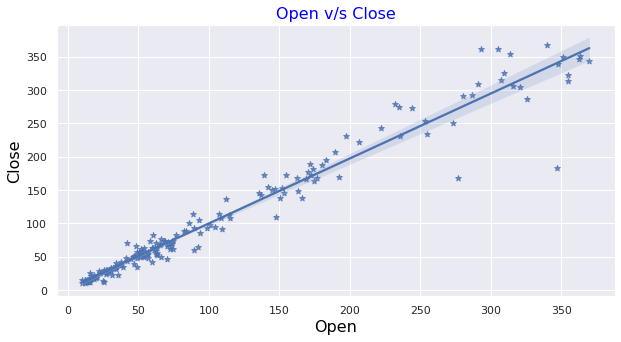

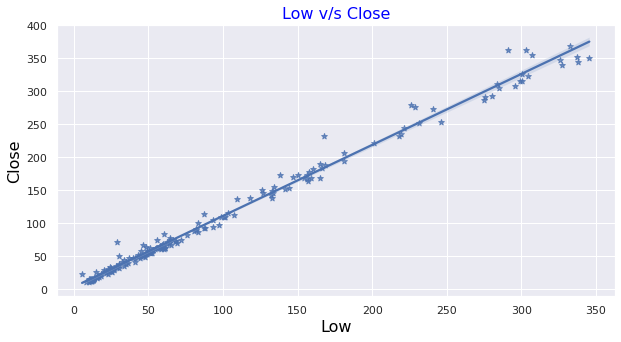

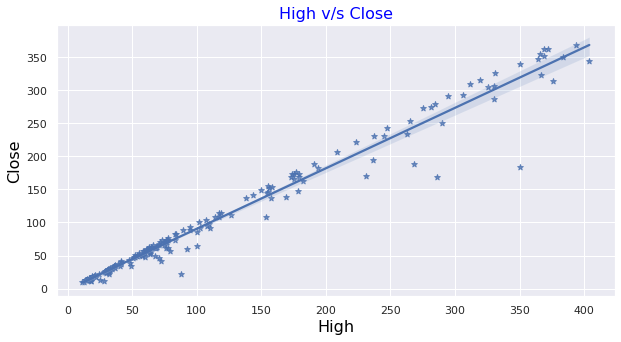

In [88]:
# Scatter plots

for i in independent_variables:
  sns.set(style='darkgrid')
  sns.regplot(dataset[i], dataset['Close'], marker='*')  # by default, fit_reg = True
  plt.title(f"{i} v/s Close", fontsize= 16, color = 'blue')
  plt.xlabel(f'{i}', fontsize=16, color = 'black')
  plt.ylabel("Close", fontsize=16, color='black')
  plt.show()


**Conclusion:**

We can see from scatter plot above, Independent variables such as Low, Open, High are showing the linearity with dependent variable Close.

#### **Histogram with bell shaped curve**

To know about the distribution of features, we are plotting histogram with default kernel density estimate which will give the idea how the data is distributed.

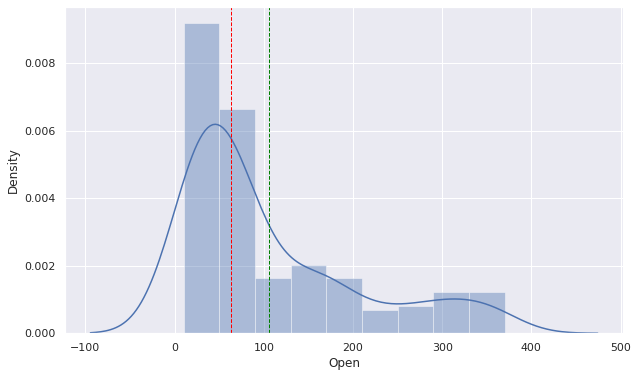

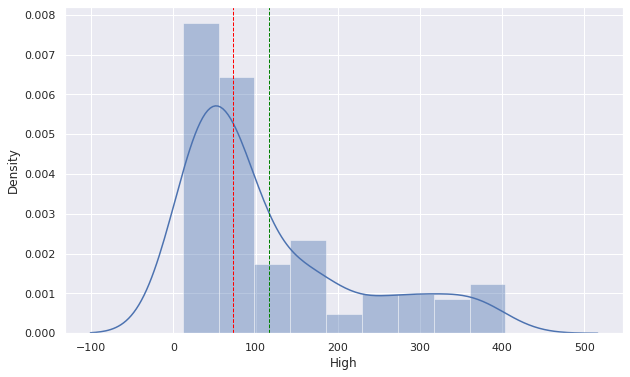

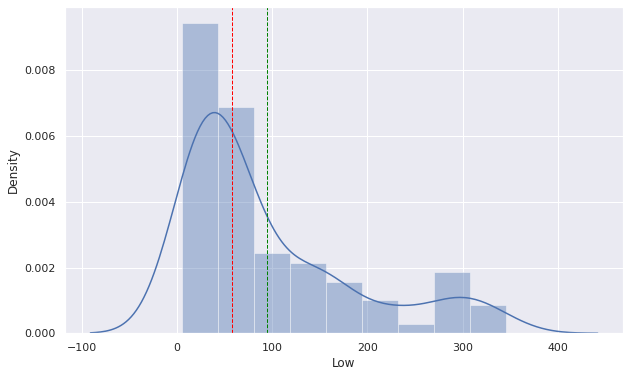

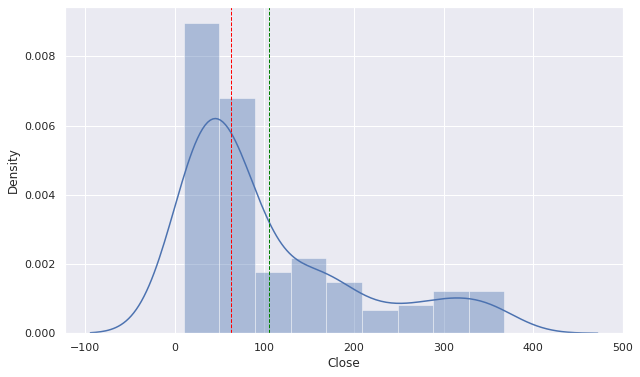

In [89]:
# Histogram
for i in dataset.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(dataset[i])
  plt.xlabel(f"{i}")

  # To plot the mean and the median line, axvline fuction is used which add the vertical line across the axis. 
  plt.axvline(dataset[i].mean(),color='green',linestyle='dashed', linewidth=1)  # vertical line at value mean.
  plt.axvline(dataset[i].median(),color='red',linestyle='dashed',linewidth=1)   # vertical line at value median.
  plt.show()
  

**Conclusion:**

From the above graph, it is observed that:



*   All the features are positively skewed distributed. 

*   Mean is greater than Median i.e Mean > Median.
  





#### **Box-Whisker plots**

We are using Box Whisker plot to visualize statistical five number summary and to detect the outliers.

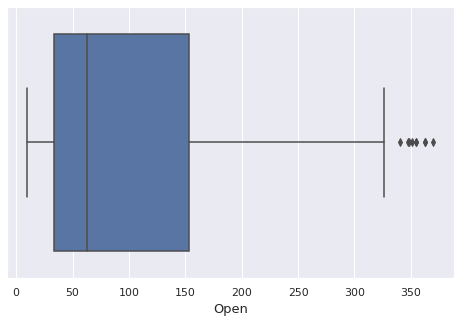

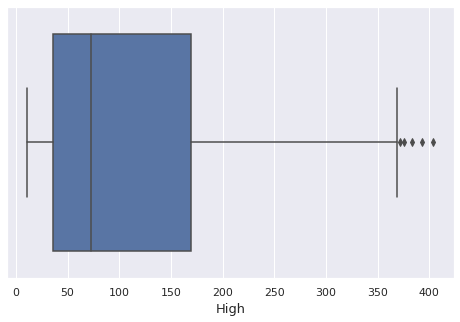

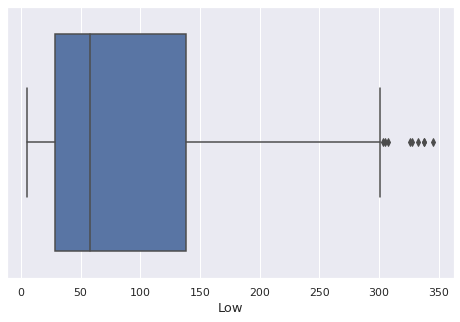

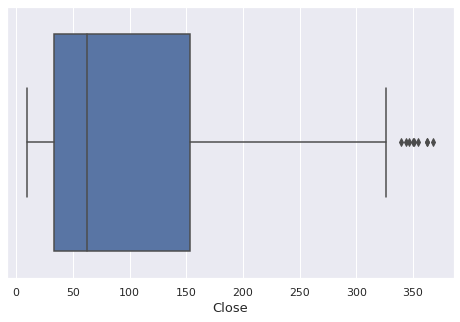

In [90]:
# Box-Whisker plot.
for i in dataset.columns:
  plt.rcParams['figure.figsize']=(8,5)
  sns.boxplot(dataset[i])
  plt.xlabel(f'{i}', fontsize=13)
  plt.show()

**Conclusion:**

It is observed that median is close to quarter one, it indicates that data is positively skewed. It is also showing some anomalies.


#### **Pair Plots** 

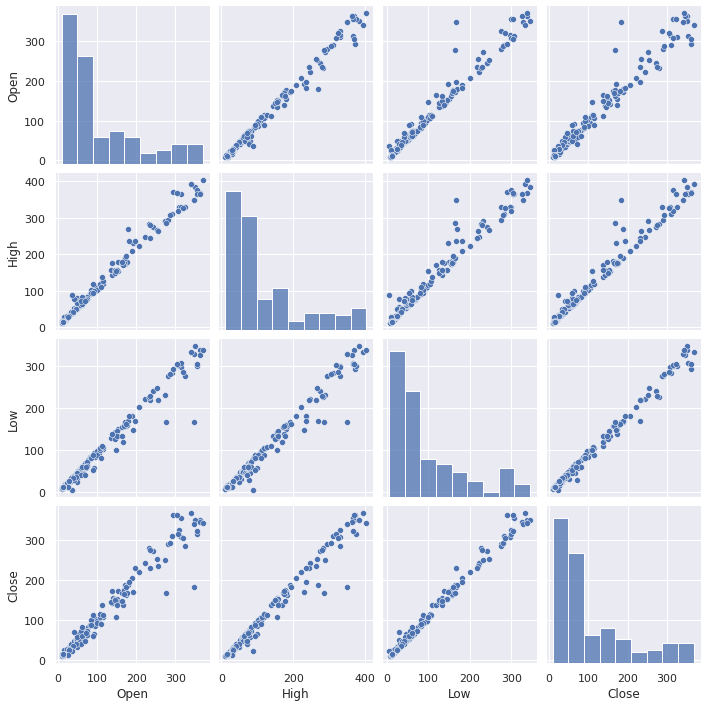

In [91]:
# Pair Plot visualization code
sns.pairplot(dataset)
plt.grid()


To know about the pairwise relationship amongs the variables close, High, Open and Low, pairwise plot is used and it is concluded that scatter plots indicates the joint relationship whereas histograms indicate the univariate distribution.

# ***Forming Assumptions and Obtaining Insights:***



The multiple regression model is based on a following assumptions:


* **Linearity:** There should be linear relationship between the dependent and independent variables.

*   **Normality:** Residual should be normally distributed with mean zero and constant variance σ2


*   **Homoscedasticity:** It means that the variance around the regression line is the same for all values of the predictor variable. 

*   **Multicollinearity:** There should not be multicollinearity in regression model.




We have observed that

1.   Variance around the regression line is same at origin sided portion after that it is showing heteroscedasticity from the scatter plots.
2.   All the features  with outliers are positively skewed, showing high multicollinearity.

These are the reasons that are violating the assumption of multivariate linear regression.

3. The Stock price is affected by social news.

Let's deal with these problems by taking proper actions:









# ***Data Cleaning and  variable transformation:***

We are using log Transformation on all features to make the distribution normal.

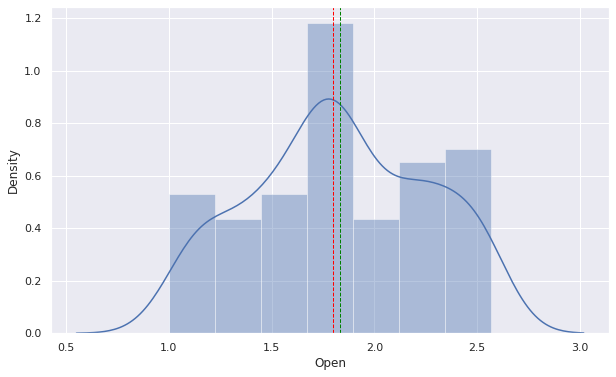

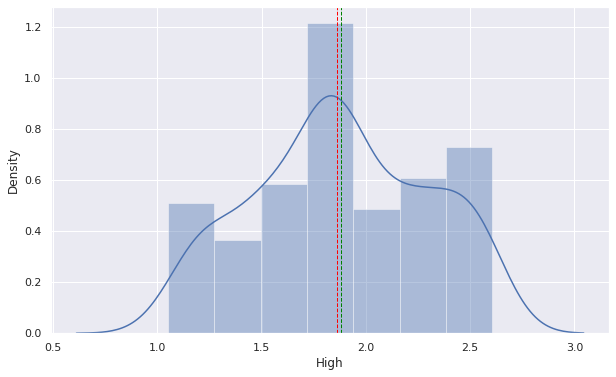

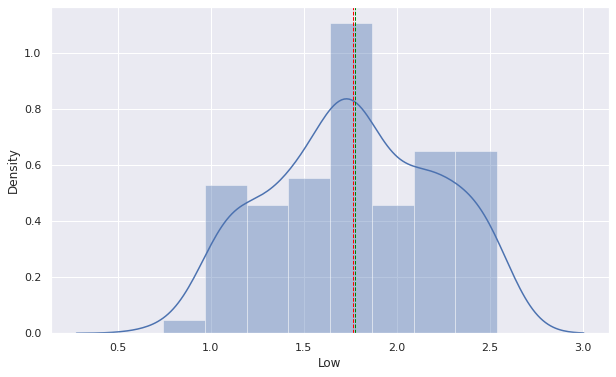

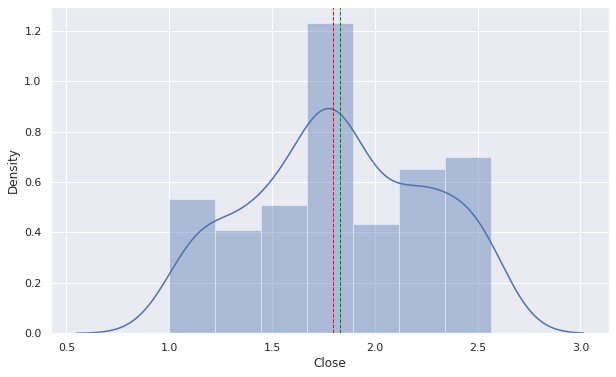

In [92]:
# Histogram
for i in dataset.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(np.log10(dataset[i]))  # log-transformation
  plt.xlabel(f"{i}")

  # To plot the mean and the median line, axvline fuction is used which add the vertical line across the axis. 
  plt.axvline(np.log10(dataset[i]).mean(),color='green',linestyle='dashed', linewidth=1)  # vertical line at value mean.
  plt.axvline(np.log10(dataset[i]).median(),color='red',linestyle='dashed',linewidth=1)   # vertical line at value median.
  plt.show()

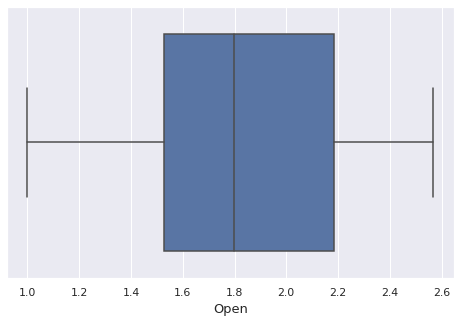

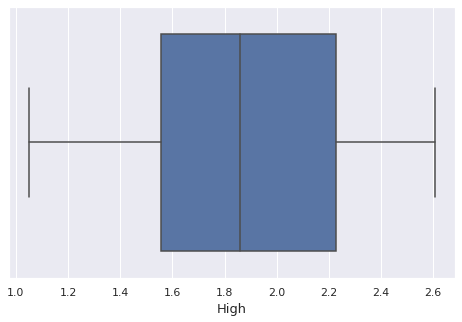

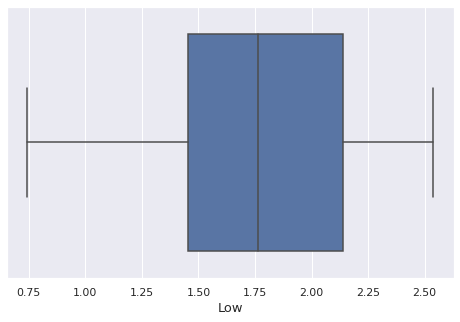

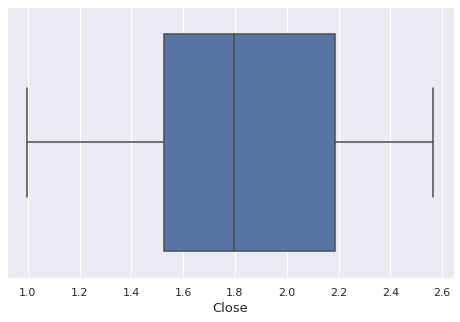

In [93]:
# Box-Whisker plot.
for i in dataset.columns:
  plt.rcParams['figure.figsize']=(8,5)
  sns.boxplot(np.log10(dataset[i]))    # log-transfomation
  plt.xlabel(f'{i}', fontsize=13)
  plt.show()

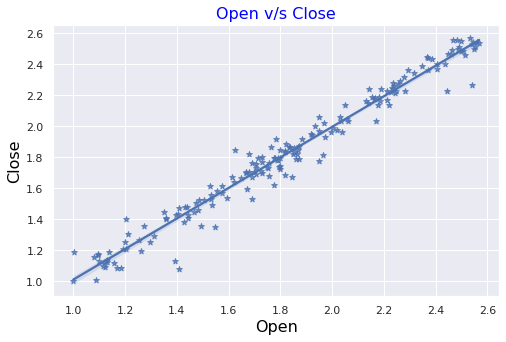

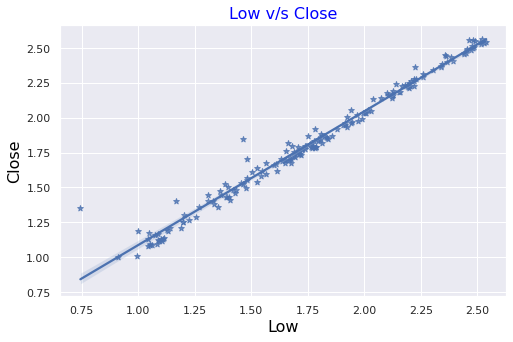

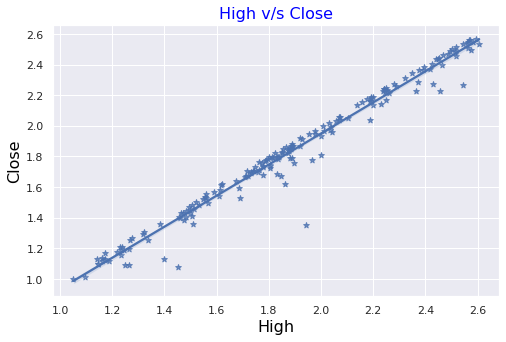

In [94]:
# Scatter plots
for i in independent_variables:
  sns.set(style='darkgrid')
  sns.regplot(np.log10(dataset[i]), np.log10(dataset['Close']), marker='*')  # by default, fit_reg = True
  plt.title(f"{i} v/s Close", fontsize= 16, color = 'blue')
  plt.xlabel(f'{i}', fontsize=16, color = 'black')
  plt.ylabel("Close", fontsize=16, color='black')
  plt.show()

We can see clearly that after applying log-Ttransformation-


1.   Distribution of features are similar to normal distribution. The mean and median values are nearly same.
2.   Log-transformation diminishes the outlier's effect and heteroscedasticity.



####  **Correlation Heatmap**

Correlation Heatmap is being used to visualize the correlation between features.

<AxesSubplot:>

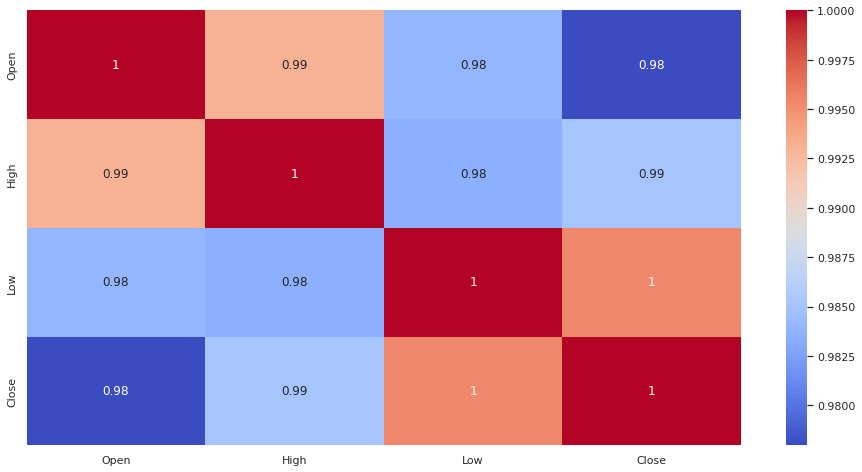

In [95]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,8))
sns.heatmap(dataset[list(dataset.columns)].corr(),cmap='coolwarm', annot = True)

**To test the hypothesis**, 

Null Hypothesis:

H0:  ρ = 0 i.e Closing Price of the n th day is not correlated to the Opening Price of n+1 th day. 

Alternative Hypothesis:


H1: ρ ≠ 0 (two tailed hypo) i.e Closing Price of the n th day is correlated to the  Opening Price of n+1 th day

We can use the test statistic,

 t = r(n-2)^0.5 / (1-r^2)^0.5  
 
 By using test statistic, we can calculate the p-value.

In [96]:
# Test Statistic r = 0.98
t = 0.98*((185-2)**0.5)/(1-0.98**2)**(0.5)
t

66.61990784451831

In [97]:
import scipy.stats      
#find p-value for two-tailed test
scipy.stats.t.sf(abs(66.6199), df=183)*2

2.937087634861135e-130

**conclusion:** 

0.00000 is the p-value. As this p-value is less than 0.05 (level of siginficance), we can reject the null hypothesis. 

There is sufficient statistical evidence at the α = 0.05 level to conclude that there is a significant linear relationship between n th day closing price and (n+1)th of the opening price.

# ***Features Engineering and Data Pre-processing***

A Variance Inflation Factor (VIF) is measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple predictor variables in a multiple regression model. It means that it measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# The independent variables (IV) set is ['High', 'Open', 'Low']
df_iv = dataset[independent_variables]  # dataframe of independent variables.
# VIF dataframe
vif_data=pd.DataFrame()        # creating Dataframe.
vif_data['Features']=df_iv.columns
# calcultating VIF for each feature
vif_data['VIF']=[variance_inflation_factor(df_iv.values, i) for i in range(len(df_iv.columns))]
vif_data

,Features,VIF
0,Open,175.185704
1,Low,71.574137
2,High,167.057523


VIF of independent features are very high. However the given dataset contains three independent variables so we can ignore the multicollinearity as dropping or merging of variables leads to loss of information.

In [99]:
# To create the data of independent variables.
x =np.log10(dataset[independent_variables]).values  # Applying log transformation  independent_variables

# To create the data of dependednt variable.
y=np.log10(dataset['Close']).values                   # Applying log tranformation


In [100]:
# Splitting the dataset into the training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)      # keeping 25 % data for testing.


In [101]:
# Transforming data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    # It means mean = o and scales the data into unit Variance.
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# ***Model Implementation***

### Multiple Linear Regression

The linear regression model represents the response variable (y) as a function of open, high and low as are the predictor variables in given dataset is -

                              Y = βo + β1 X1 + β2X2 + β3X3

β1, β2, β3 are parameters to be estimated for X1, X2, and X3 predictor variables.


In [102]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [103]:
round(regressor.intercept_,4)

1.8148

In [104]:
np.round(regressor.coef_,4)

array([-0.2373,  0.3087,  0.3531])

In [105]:
regressor.coef_

array([-0.23726139,  0.30870707,  0.35313554])

In [106]:
y_pred=regressor.predict(x_test)
y_predx = regressor.predict(x)

The fitted linear regression model is

                             ^Y = 1.8148 + 0.3087 X1 - 0.2373 X2 + 0.3531 X3




Now, to test the hypothesis, Here cap represent the estimate value.

**H**0: The close price of stock is independent of Highest, Lowest and Opening price of stock. i.e ˆβ1 = ˆβ2 = ˆβ3 = 0

**H**1: The close price of stock is dependent of Highest, Lowest and Opening price of stock. i.e ˆβ1 ≠ ˆβ2 ≠ ˆβ3 ≠ 0

In [107]:
df = pd.DataFrame({'Actual': y, "Predicted":y_predx})
residual = np.subtract(df['Actual'], df['Predicted'])

In [108]:
# mean sum of square of regression
msr = (np.sum(np.square(df['Predicted']- np.mean(y))))/3  #  with 3 degree of freedom of sum of square of regression

In [109]:
# mean sum of square of residual
mse= (np.sum(np.square(df['Predicted'] - df['Actual'])))/181 # with 181 degree of freedom of sum of square of error or residual

In [110]:
F_statistic = msr/mse   # F statistic
F_statistic

57.66628842954431

Conclusion: 

The Tabulated F-Statistics of 185 obervation  is F tab (3, 181) = 2.60 (from F_ Distribution tables used in analysis of variance) with 3 degree of freedom of sum of quare of regression and 181 degree of freedom of sum of square of residual which are the source of variation.

F Cal = 57.6666 (approx)

F cal > F tab (3, 181) so we reject the null hypothesis with 5 % level of siginficance. we conclude that the close price of stock is dependent of Highest, Lowest and Opening price of stock i.e ˆβ1 ≠ ˆβ2 ≠ ˆβ3 ≠ 0

Text(0.5, 1.0, 'Homoscedasticity')

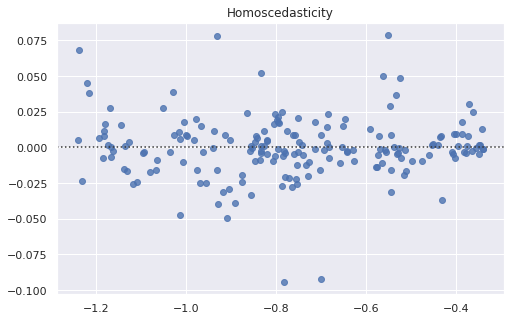

In [111]:
# To check the Homoscedasticity.
sns.residplot(residual, y_predx)
plt.title('Homoscedasticity')

In [112]:
# Calculating the performance metrics.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Mean Square Error
MSE_linear = round(mean_squared_error((10**y_test),10**(y_pred)),4)
print(f"Mean squared Error : {MSE_linear}")

# Root Mean Square Error
RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

# Mean Absolute Error
MAE_linear = round(mean_absolute_error(10**(y_test),(10**y_pred)),4)
print(f"Mean Absolute Error : {MAE_linear}")

# R2 squared.
R2_linear = round(r2_score(10**(y_test), 10**(y_pred)),4)
print(f"R2 score : {R2_linear}")

# Adjusted R2 squared.
Adjusted_R2_linear = round(1-(1-r2_score(10**y_test,10**y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),3)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")

Mean squared Error : 67.2566
Root Mean squared Error : 8.201
Mean Absolute Error : 4.9777
R2 score : 0.9935
Adjusted R2 score : 0.993


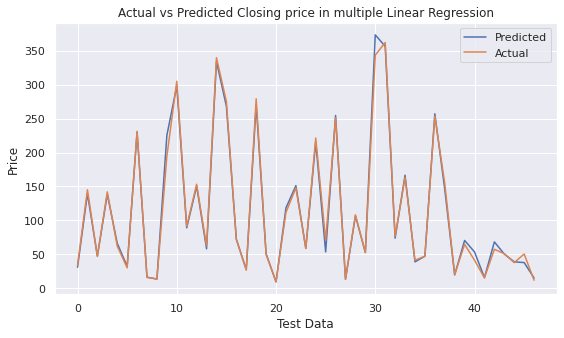

In [113]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price in multiple Linear Regression")
plt.show()

This graph tell us how the actual and predicted closing price fit to testing data.

### Ridge Regression


In [114]:
# importing ridge regressor model.
from sklearn.linear_model import Ridge    
ridge = Ridge()         # iitializing the model

# initiating the parameter grid for alpha (regularization strength).
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# cross validation. 
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [115]:
# finding the best parameter value (for alpha)
ridge_regressor.best_params_

{'alpha': 0.01}

In [116]:
# getting the best score for optimal value of alpha.
ridge_regressor.best_score_

-0.000910907941587197

In [117]:

# predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(x_test)

In [118]:
# evaluating performance.

#Mean Squared Error
MSE_ridge  = round(mean_squared_error(10**(y_test),10**(y_pred_ridge)),4)
print("Mean squared Error :" , MSE_ridge)

#Root Mean Squared Error
RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print("Root Mean squared Error :" ,RMSE_ridge)

# Mean Absolute Error
MAE_ridge = round(mean_absolute_error(10**(y_test),10**(y_pred_ridge)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

# R squared 
R2_ridge = round(r2_score(10**(y_test), 10**(y_pred_ridge)),4)
print("R2 score :" ,R2_ridge)

# adjusted R squared.
Adjusted_R2_ridge = round(1-(1-r2_score(10**y_test, 10**y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_ridge)

Mean squared Error : 66.9377
Root Mean squared Error : 8.1815
Mean Absolute Error : 4.9906
R2 score : 0.9935
Adjusted R2 score:  0.9931


Text(0.5, 1.0, 'Actual vs Predicted Closing price Ridge regression')

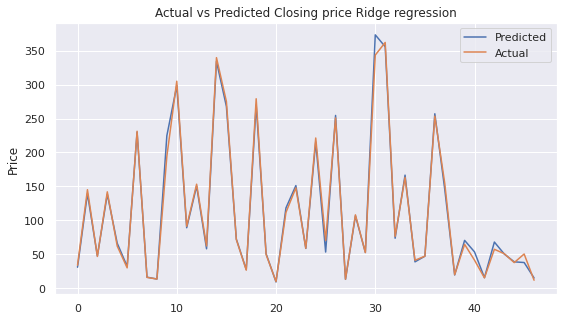

In [119]:
# Plotting predicted and actual target variable values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge regression")
     

### Lasso Regression


In [120]:
# Import LASSO model.
from sklearn.linear_model import Lasso

In [121]:
# Initializing the model with some base values.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fitting the model on our training data.
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [122]:
# printing the intercept and coefficients.
lasso.intercept_

1.8148069598129852

In [123]:
lasso.coef_

array([-0.21099688,  0.30098347,  0.33442783])

In [124]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters. 
                                                                                  
lasso_regressor = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [125]:
# getting the best parameter
lasso_regressor.best_params_          # after several iterations and trials, we get this value as best parameter value.
     

{'alpha': 1e-08}

In [126]:
# getting the best score
lasso_regressor.best_score_

-0.0007555123729261684

In [127]:
# Predicting on the test dataset.
y_pred_lasso = lasso_regressor.predict(x_test)
print(y_pred_lasso)

[1.49194896 2.14419801 1.67702213 2.1415287  1.8225796  1.50973027
 2.36144805 1.21538867 1.13703544 2.35242189 2.47434209 1.94977289
 2.17728909 1.76477639 2.5236785  2.42832579 1.86056175 1.44242067
 2.43166424 1.70710089 0.97362101 2.07322587 2.17964294 1.76932783
 2.33337799 1.7293948  2.40560117 1.12197871 2.02844655 1.72350898
 2.57199583 2.55190457 1.86814746 2.22166607 1.59093921 1.6749531
 2.40994052 2.16410655 1.29532687 1.848388   1.72929127 1.19864245
 1.83481454 1.7032458  1.59154797 1.57914633 1.18303694]


In [128]:
# checking the performance using evaluation metrics.
#Mean Squared Error
MSE_lasso  = round(mean_squared_error(10**(y_test),10**(y_pred_lasso)),4)
print("Mean squared Error :" , MSE_lasso)

#Root Mean Squared Error
RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

# Mean Absolute Error
MAE_lasso = round(mean_absolute_error(10**(y_test),10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

# R2 squared
R2_lasso = round(r2_score(10**(y_test), 10**(y_pred_lasso)),4)
print("R2 score :" ,R2_lasso)

#Adjusted R2 squared.
Adjusted_R2_lasso = round(1-(1-r2_score(10**y_test, 10**y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)

Mean squared Error : 67.2564
Root Mean squared Error : 8.201
Mean Absolute Error : 4.9777
R2 score : 0.9935
Adjusted R2 score:  0.993


Text(0.5, 1.0, 'Actual vs Predicted Closing price LASSO regression')

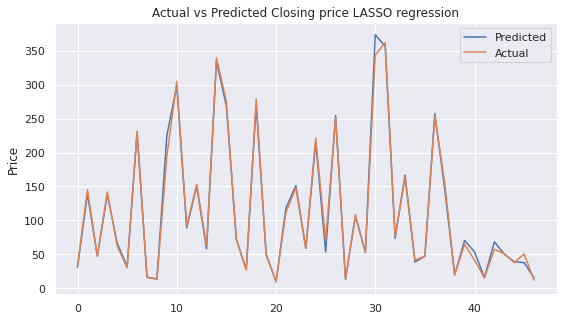

In [129]:
# plotting the predicted values vs actual.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price LASSO regression")

### Elastic-Net Regression:

In [130]:
# importing and initializing Elastic-Net Regression.
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# initializing parameter grid.
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# cross-validation.
elasticnet_regressor = GridSearchCV(elasticnet_model, elastic_net_param_grid, scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [131]:
# finding the best parameter
elasticnet_regressor.best_params_

{'alpha': 1e-08, 'l1_ratio': 0.1}

In [132]:
# finding the best score for the optimal parameter.
elasticnet_regressor.best_score_

-0.0007553232313966346

In [133]:
# making the predictions.
y_pred_elastic_net = elasticnet_regressor.predict(x_test)    

In [134]:
# Evaluting Metric.
# Mean Squared Error
MSE_elastic_net  = round(mean_squared_error(10**(y_test),10**(y_pred_elastic_net)),4)
print("Mean squared Error :" , MSE_elastic_net)

# Root Mean Squared Error
RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)


# Mean Absolute Error
MAE_elastic_net = round(mean_absolute_error(10**(y_test),10**(y_pred_elastic_net)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

# R squared.
R2_elastic_net = round(r2_score(10**(y_test), (10**y_pred_elastic_net)),4)
print("R2 score :" ,R2_elastic_net)

# Adjusted R squared.
Adjusted_R2_elastic_net = round(1-(1-r2_score(10**y_test, 10**y_pred_elastic_net))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_elastic_net)
     

Mean squared Error : 67.2555
Root Mean squared Error : 8.2009
Mean Absolute Error : 4.9778
R2 score : 0.9935
Adjusted R2 score:  0.993


Text(0.5, 1.0, 'Actual vs Predicted Closing price Elastic Net regression')

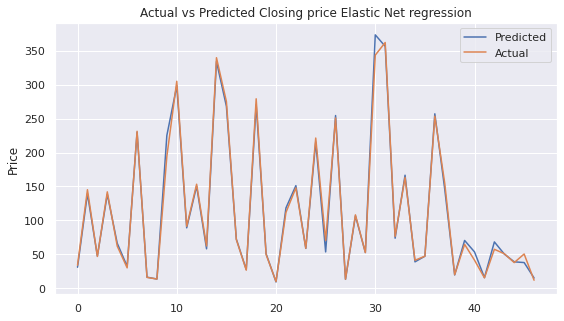

In [135]:
#plot the actual and predicted target variables values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_elastic_net)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Elastic Net regression")
     

### Comparison among implemented Models

In [136]:
linear_regessor_list = {'Mean squared Error' : MSE_linear,
                   'Root Mean squared Error' : RMSE_linear, 'Mean Absolute Error': MAE_linear,'R2 score' : R2_linear,'Adjusted R2 score' : Adjusted_R2_linear }

In [137]:
# converting above dict into a dataframe
metric_dataset = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()

In [138]:
# renaming the columns.
metric_dataset = metric_dataset.rename(columns={'index':'Metric',0:'Linear Regression'})

In [139]:
# Now saving these metrics to our metrics dataframe. First we save them in a list and then we pass them to the df.
metric_dataset['Lasso'] = [MSE_lasso, RMSE_lasso, MAE_lasso, R2_lasso, Adjusted_R2_lasso]     

In [140]:
# storing these values in a list and appending to our metric df.
ridge_regressor_list = [MSE_ridge,RMSE_ridge, MAE_ridge, R2_ridge,Adjusted_R2_ridge]
metric_dataset['Ridge'] = ridge_regressor_list

In [141]:
# storing these metrics in our dataframe.
elastic_net_metric_list = [MSE_elastic_net,RMSE_elastic_net, MAE_elastic_net, R2_elastic_net,Adjusted_R2_elastic_net]
metric_dataset['Elastic Net'] = elastic_net_metric_list

In [142]:
# storing these metrics in our dataframe.
elastic_net_metric_list = [MSE_elastic_net,RMSE_elastic_net, MAE_elastic_net, R2_elastic_net,Adjusted_R2_elastic_net]
metric_dataset['Elastic Net'] = elastic_net_metric_list

In [143]:
metric_dataset

,Metric,Linear Regression,Lasso,Ridge,Elastic Net
0,Mean squared Error,67.2566,67.2564,66.9377,67.2555
1,Root Mean squared Error,8.2010,8.2010,8.1815,8.2009
2,Mean Absolute Error,4.9777,4.9777,4.9906,4.9778
3,R2 score,0.9935,0.9935,0.9935,0.9935
4,Adjusted R2 score,0.9930,0.9930,0.9931,0.9930


Now, to test the hypothesis,

**H**0: The fit is good that means how well models fit a given testing set of data.

v/s

**H**1: The fit is not good that means models don't fit a given testing set of data.

It is observed that adjusted R2 score of all models is greater than 0.5 (reference score)

so we accept the null hypothesis with 5% level of significance(LOS) i.e the fit is good. It means that models fits a given testing set of data. 

Several models are implemented on the given dataset in order to predict the closing price and found that Elastic net regression is the best performing model with adjusted R squared is 0.9931.

We came to conclusion that
All models fits good. “ 99% variability in dependent variable "Close" explained by independent variables 

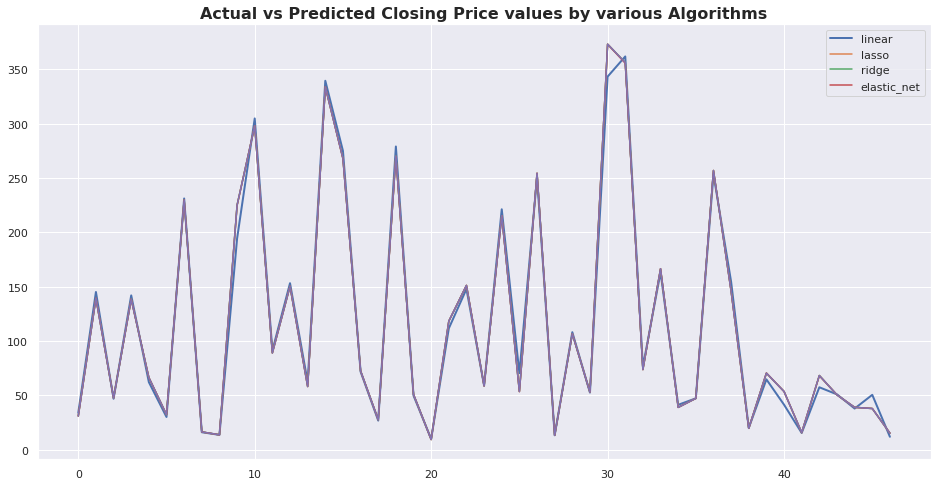

In [144]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(16,8))
plt.plot(10**y_test, linewidth=2)
plt.plot(10**y_pred)
plt.plot(10**y_pred_lasso)
plt.plot(10**y_pred_ridge)
plt.plot(10**y_pred_elastic_net)
plt.legend(['linear','lasso','ridge','elastic_net'])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)
plt.show()

# **Future Work**



*   Time Series model can be used as predcitive model for predicationg yes bank stock closing price.

*   More statistical test can be used to give the strogest evidence on several implemented models.



# ***Conclusion***

The dataset was used that contains data about Yes Bank Stock Prices.  Exploratory Data Analysis, Feature Selection and Data Preprocessing and various models' implementation are done and came to conclusion that-

*  Given dataset does not have missing values and duplicates values.

* The closing price of stock is considered as dependent features whereas opening price, lowest price and highest price of stock are independent features.

* Since 2018, yes bank had been in the news because of the fraud case involving the co-founder Rana Kapoor. This news directly impacted the stock price as a result the closing price fall down rapidly and come to zero at year 2020

* Independent variables such as Low, Open, High are shown the linearity with dependent variable Close.

* There is sufficient statistical evidence at the α = 0.05 level to conclude that there is a significant linear relationship between n th day closing price and (n+1)th of the opening price.

* All the freatures are positively skewed distributed. Mean is greater than Median i.e Mean > Media.

* After the log transformation, Distribution of features are similar to normal distribution. The mean and median values are nearly same. It diminishes the outlier's effect and heteroscedasticity.

* In multiple linear regression, F cal > F tab (3, 181) so we reject the null hypothesis with 5 % level of significance. we conclude that the close price of stock is dependent of Highest, Lowest and Opening price of stock i.e ˆβ1 ≠ ˆβ2 ≠ ˆβ3 ≠ 0. It may be possible that estimate parameters are lossing preciseness as multicolineariy is considered.

* The fit is good at LOS 5%. It means that all models fits a given testing set of data.

* Several models are implemented on the given dataset in order to predict the closing price and found that Elastic net regression is the best performing model with adjusted R squared is 0.9931.


It was wonderful learning experience while working on this project. This project has developed thinking skills related to the topics. This project gave real insights. we enjoyed each and every moment. Thank You!